# Context
This notebook is created ti be a summary of webscrapping techniques using Selenium package.

# Packages

In [16]:
#!pip install --upgrade anticaptchaofficial --user

     ---------------------------------------- 0.0/98.7 kB ? eta -:--:--
     ---------------- ----------------------- 41.0/98.7 kB 1.9 MB/s eta 0:00:01
     ------------------------------------- -- 92.2/98.7 kB 2.6 MB/s eta 0:00:01
     ---------------------------------------- 98.7/98.7 kB 1.1 MB/s eta 0:00:00


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver import ActionChains
from selenium.webdriver.common.alert import Alert
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from PIL import Image
from anticaptchaofficial.recaptchav2proxyless import * # breack catpchas

import time
import os
import pandas as pd

In [2]:
path = os.getcwd().replace('GitHub', 'github_data')

## Always have your chromedriver up to date
The code bellow will verify if your current chromedrinker is updated and if it's not, it will download and install the most recent version for you, always making sure its compatibility with your chrome browser.<br>
This code will also open an chrome page - don't close it.
All pages that we will browser in will be in that Chrome new page.

In [ ]:
servico = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=servico)

# Selecting elements on page

In [14]:
file = path + r"\Pagina Hashtag.html"
driver.get(file)

# The magic of Inspect elements
Websites elements will have an variable useful to sucessfully identify it so we can use them to perform an action like a human - one of the biggest advantages of web scrapping. Inspect the web page and make sure to use the last button on top that seems like a mouse pointer and them you will be able to find each element components.

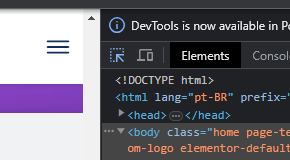

## The order of elements identification variables
We have 3 main variables that will allow us to select an element

1. id
2. CLASS_NAME
3. XPATH


Which one is the best? The best one is the one that is unique and less likely to change with website updates.<br><br>
Id is useful when it's unique and it's not so likely to change with websites updates, same for CLASS_NAME.<br>
XPATH has the benefit to be almost always unique, but it give us the elemnt location on page, so if an element is on the top right corner today and its changes to the top left corner tomorrow, it will fail.<BR><BR>
    
**There are other ways to select it**

## By ID

In [51]:
driver.find_element(By.ID, 'fullname').send_keys("Caroline Ferreira")
driver.find_element(By.ID, 'email').send_keys("myemail@gmail.com")
driver.find_element(By.ID, '_form_176_submit').click()

## By Class name

In [58]:
driver.find_element(By.CLASS_NAME, 'custom-logo-link').click()

## By TAG_NAME

In [59]:
titulo = driver.find_element(By.TAG_NAME, 'h2').text
print(titulo)

Conteúdos 100% gratuitos da Hashtag Treinamentos


## By PARTIAL LINK TEXT

In [54]:
numero_whatsapp = driver.find_element(By.PARTIAL_LINK_TEXT, 'WhatsApp').text
print(numero_whatsapp)

(21) 99658-2442 (WhatsApp)


## By Name

In [60]:
driver.find_element(By.NAME, 'email').send_keys("myemail@gmail.com")

## By XPATH

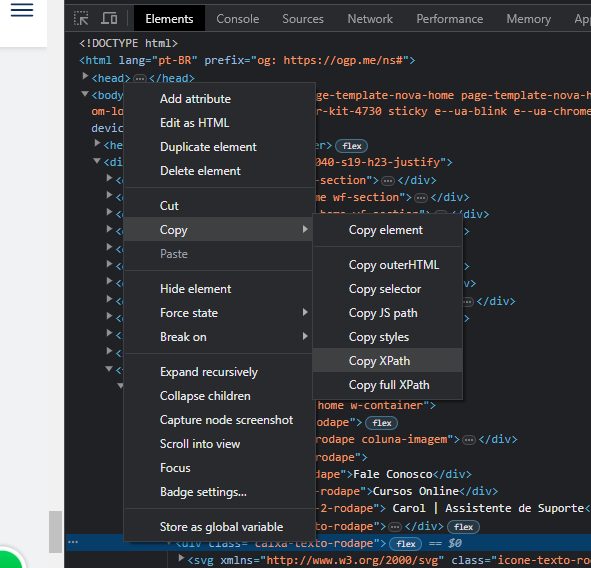

In [61]:
link = driver.find_element(By.XPATH, '/html/body/div/footer/div/div/div[1]/div[2]/div[5]/div/a').text
print(link)

(21) 99658-2442 (WhatsApp)


In [62]:
link = driver.find_element(By.XPATH, '/html/body/div/footer/div/div/div[1]/div[2]/div[5]/div/a').get_attribute('href')
print(link)

https://api.whatsapp.com/send?phone=5521996582442&text=Ol%C3%A1%2C%20gostaria%20de%20tirar%20uma%20d%C3%BAvida%20%20sobre%20o%20curso%20online


# Extracting links from images

In [65]:
driver.find_element(By.XPATH, '/html/body/div/div[1]/div/div/div[1]/a[1]/span').click()

In [66]:
list_of_images = driver.find_elements(By.TAG_NAME, 'figure')
# Check if it has all images you are looking for
print(len(list_of_images))

5


Html works in tags. When we code driver.find_element we are looking for it in its entire html page. Now that we have selected the ``list_of_images`` we are precisely in the figure tag.

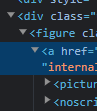

In [75]:
for element in list_of_images:
    try:
        print(element.find_element(By.TAG_NAME, 'a').get_attribute('href'))
    except:
        continue

https://www.hashtagtreinamentos.com/curso-de-excel-online
https://www.hashtagtreinamentos.com/curso-power-bi
https://www.hashtagtreinamentos.com/curso-vba-excel
https://www.hashtagtreinamentos.com/curso-de-power-apps


# Summary of webscrapping action once an element was found
driver.find_element(By.[...],'')

1. .text
2. click()
3. send_keys()
3. get_atrribute()

In [ ]:
driver.quit()

# Working with forms

In [115]:
# restart driver 
driver = webdriver.Chrome()

In [116]:
file = path + r"\formscrapping.html"
driver.get(file)

### Value attribute in inputs

- .text
- .get_attribute("value")
- .is_selected

## Click in a standard button

In [117]:
driver.find_element(By.XPATH, '/html/body/form/input[1]').click()
alerta = driver.switch_to.alert
alerta.accept()

## Checkbox

In [118]:
driver.find_element(By.XPATH, '/html/body/form/input[2]').click()

In [119]:
#  check if it was clicked or not
value = driver.find_element(By.XPATH, '/html/body/form/input[2]').is_selected()
print(value)

True


## Color selection

In [120]:
# fill color
driver.find_element(By.XPATH, '/html/body/form/input[5]').send_keys('#2143E8')

In [121]:
# chech selected color
value = driver.find_element(By.XPATH, '/html/body/form/input[4]').get_attribute("value")
print(value)

#000000


## Date button

In [122]:
# fill value
driver.find_element(By.XPATH, '/html/body/form/input[6]').send_keys('15/02/1994')

In [123]:
# get value
value = driver.find_element(By.XPATH, '/html/body/form/input[6]').get_attribute("value")
print(value)

1994-02-15


## Datetime button

In [124]:
from selenium.webdriver.common.keys import Keys

driver.find_element(By.XPATH, '/html/body/form/input[7]').send_keys('15/02/1994', Keys.TAB, '22:00')

In [125]:
value = driver.find_element(By.XPATH, '/html/body/form/input[7]').get_attribute("value")
print(value)

1994-02-15T22:00


## Select file button

In [126]:
path = os.getcwd().replace('GitHub', 'github_data')
file = path + r"\formscrapping.html"

driver.find_element(By.XPATH, '/html/body/form/input[8]').send_keys(file)

In [127]:
value = driver.find_element(By.XPATH, '/html/body/form/input[8]').get_attribute("value")
print(value)

C:\fakepath\formulario.html


## Select year and month button

In [128]:
driver.find_element(By.XPATH, '/html/body/form/input[9]').send_keys('janeiro', Keys.TAB, '1980')

value = driver.find_element(By.XPATH, '/html/body/form/input[9]').get_attribute('value')
print(value)

1980-01


## Numeric fields

In [129]:
driver.find_element(By.XPATH, '/html/body/form/input[10]').clear()
driver.find_element(By.XPATH, '/html/body/form/input[10]').send_keys("123456")

## Password fields

In [130]:
driver.find_element(By.XPATH, '/html/body/form/input[11]').send_keys("123456")

value = driver.find_element(By.XPATH, '/html/body/form/input[11]').get_attribute('value')
print(value)

123456


## Radiobuttons

In [131]:
driver.find_element(By.XPATH, '/html/body/form/input[14]').click()

In [132]:
value = driver.find_element(By.XPATH, '/html/body/form/input[14]').is_selected()
print(value)

True


## Slider

In [133]:
value = driver.find_element(By.XPATH, '/html/body/form/input[15]').get_attribute('value')
print(value)

50


In [134]:
elemento = driver.find_element(By.XPATH, '/html/body/form/input[15]')

elemento.clear()
for i in range(50 - 30):
    elemento.send_keys(Keys.ARROW_LEFT)

## Textbox

In [135]:
driver.find_element(By.XPATH, '/html/body/form/input[16]').send_keys("Testing")

In [136]:
value = driver.find_element(By.XPATH, '/html/body/form/input[16]').get_attribute("value")
print(value)

Testing


## Hours box

In [137]:
driver.find_element(By.XPATH, '/html/body/form/input[17]').send_keys('11:11')

## Personalized date box

In [138]:
driver.find_element(By.XPATH, '/html/body/form/input[18]').send_keys('12', '2001')

## Text blocks

In [139]:
driver.find_element(By.XPATH, '//*[@id="story"]').clear()
driver.find_element(By.XPATH, '//*[@id="story"]').send_keys('Hello, wolrd!', Keys.ENTER, 'This is a form scrapping!')

## Selecting items on a list

In [140]:
driver.find_element(By.XPATH, '/html/body/form/select[1]').send_keys('B')

In [141]:
value = driver.find_element(By.XPATH, '/html/body/form/select[1]').get_attribute('value')
print(value)

b


In [142]:
driver.find_element(By.XPATH, '/html/body/form/select[1]').click()
time.sleep(0.5)
driver.find_element(By.XPATH, '/html/body/form/select[1]/option[3]').click()

In [143]:
elemento = driver.find_element(By.TAG_NAME, 'select')
elemento_select = Select(elemento)

In [144]:
elemento_select.select_by_visible_text('C')

In [ ]:
driver.quit()

# Automaing receipts generation

In [21]:
options = webdriver.ChromeOptions()

# make Chrome stop blocking downloads
options.add_experimental_option("prefs", {
  "download.prompt_for_download": False,
  "download.directory_upgrade": True,
  "safebrowsing.enabled": True
})

servico = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=servico, options=options)

In [22]:
path = os.getcwd().replace('GitHub', 'github_data')
file = path + r"\login.html"
driver.get(file)

In [23]:
# preencher o login e a senha
driver.find_element(By.XPATH, '/html/body/div/form/input[1]').send_keys("myemail@gmail.com")
driver.find_element(By.XPATH, '/html/body/div/form/input[2]').send_keys("123456")
# clicar no botao de fazer login
driver.find_element(By.XPATH, '/html/body/div/form/button').click()

In [ ]:
table = pd.read_excel(path+r"\NotasEmitir.xlsx") 
table.head(5)

In [25]:
table.index

RangeIndex(start=0, stop=30, step=1)

In [26]:
# para cada cliente - rodar o processo de emissao de nota fiscal
for linha in range(0, 3):
    # preencher os dados da NF
    
    # nome/razao social
    driver.find_element(By.NAME, 'nome').send_keys(table.loc[linha, "Cliente"])

    # endereco
    driver.find_element(By.NAME, 'endereco').send_keys(table.loc[linha, "Endereço"])

    # bairro
    driver.find_element(By.NAME, 'bairro').send_keys(table.loc[linha, "Bairro"])

    # municipio
    driver.find_element(By.NAME, 'municipio').send_keys(table.loc[linha, "Municipio"])

    # cep
    driver.find_element(By.NAME, 'cep').send_keys(str(table.loc[linha, "CEP"]))
    
    # UF
    driver.find_element(By.NAME, 'uf').send_keys(table.loc[linha, "UF"])
    
    # CPF/CNPJ
    driver.find_element(By.NAME, 'cnpj').send_keys(str(table.loc[linha, "CPF/CNPJ"]))

    # Inscricao estadual
    driver.find_element(By.NAME, 'inscricao').send_keys(str(table.loc[linha, "Inscricao Estadual"]))

    # descrição
    texto = table.loc[linha, "Descrição"]
    driver.find_element(By.NAME, 'descricao').send_keys(texto)

    # quantidade
    driver.find_element(By.NAME, 'quantidade').send_keys(str(table.loc[linha, "Quantidade"]))

    # valor unitario
    driver.find_element(By.NAME, 'valor_unitario').send_keys(str(table.loc[linha, "Valor Unitario"]))

    # valor total
    driver.find_element(By.NAME, 'total').send_keys(str(table.loc[linha, "Valor Total"]))
    
    # clicar em emitir nota fiscal
    driver.find_element(By.CLASS_NAME, 'registerbtn').click()
    
    # recarregar a página para limpar o formulário
    driver.refresh()

In [27]:
driver.quit()

# Hover with ActionChains

## Menu dropdown

In [29]:
driver = webdriver.Chrome(service=servico)

In [30]:
path = os.getcwd().replace('GitHub', 'github_data')
file = path + r"\Pagina Hashtag.html"
driver.get(file)

In [32]:
menu_dropdown = driver.find_element(By.XPATH, '//*[@id="menu-item-dropdown-16313"]')
item_in_menu = driver.find_element(By.XPATH, '//*[@id="menu-item-6302"]/a')

In [39]:
time.sleep(5) # act like a human

# Hover mouse in menu
# move_to_element is equivalent to 'hover'
ActionChains(driver).move_to_element(menu_dropdown).perform()
item_in_menu.click() # now you're free to click

In [40]:
driver.quit()

# Pop up alerts

In [48]:
driver = webdriver.Chrome(service=servico)
driver.get(path + r"\alertas.html")

## Select a pop-up alert

In [56]:
driver.find_element(By.XPATH, '/html/body/div[1]/input').click()

## Simple way

In [57]:
alert = driver.switch_to.alert
alert.accept()

## Full way

In [58]:
driver.find_element(By.XPATH, '/html/body/div[1]/input').click()

In [59]:
alert = Alert(driver)
alert.accept()

## Confirmation pop-ups

In [60]:
driver.find_element(By.XPATH, '/html/body/div[2]/input').click()
alert = Alert(driver)

In [61]:
alert.accept()

In [62]:
driver.find_element(By.XPATH, '/html/body/div[2]/input').click()
alert = Alert(driver)

In [63]:
alert.dismiss()

## Get alert text

In [66]:
 driver.find_element(By.XPATH, '/html/body/div[2]/input').click()

alert = Alert(driver)
texto = alert.text
print(texto)

Quer confirmar a emissão da NF?


In [67]:
alert.accept()

## Input pop-ups

In [68]:
driver.find_element(By.XPATH, '/html/body/div[3]/button').click()

alert = driver.switch_to.alert
time.sleep(2)

In [69]:
alert.send_keys('123123') # lembre que ele funciona, apesar de não aparecer
alert.accept()

In [70]:
driver.quit()

# Tabs and windows

In [71]:
driver = webdriver.Chrome(service=servico)
driver.get(path + r"\Pagina Hashtag.html")

## Opening new window

In [72]:
driver.find_element(By.XPATH, '/html/body/section[2]/div/div[4]/figure/a/img').click()

In [73]:
driver.find_element(By.ID, 'fullname').send_keys("Some text")

## Opening new tab

In [74]:
tab_original = driver.window_handles[0]
new_tab = driver.window_handles[1]
driver.switch_to.window(new_tab)

In [77]:
driver.find_element(By.ID, 'firstname').send_keys("Some text in the new tab")

In [78]:
driver.find_element(By.ID, 'email').send_keys("myemail@mail.com")

## Identify tab in window_handles list

In [79]:
# check every tabs title
for tab in driver.window_handles:
    driver.switch_to.window(tab)
    print(driver.title)

Todos os Cursos Hashtag Treinamentos
Curso de Excel Completo: Excel Impressionador


## New window

In [80]:
tabs = driver.window_handles
print(len(tabs))
new_janela = driver.window_handles[2]
driver.switch_to.window(new_janela)

2


IndexError: list index out of range

In [ ]:
driver.find_element(By.ID, 'fullname').send_keys("Some text in the new window")
driver.find_element(By.ID, 'email').send_keys("myemail@inthenewwindom.com")

In [ ]:
# close select tab
driver.close()

In [ ]:
# close all tabs
driver.quit()

# Wait for element to load on page
Sometimes when we load a web page it contains alert or pop-ups. The code below provides alternatives to deal with it.

## Wait for it to load

In [8]:
driver = webdriver.Chrome()

In [9]:
driver.get("https://www.hashtagtreinamentos.com/")
time.sleep(15)
driver.find_element(By.CLASS_NAME, 'eicon-close').click()

## Create a loop

In [10]:
driver.get("https://www.hashtagtreinamentos.com/")

while len(driver.find_elements(By.CLASS_NAME, 'eicon-close')) < 1:
    time.sleep(1)
time.sleep(1) # just to be sure

driver.find_element(By.CLASS_NAME, 'eicon-close').click()

## EC WebDriverWait
This one is one of the best options!

In [24]:
driver.get("https://www.hashtagtreinamentos.com/")

element = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CLASS_NAME, 'eicon-close')))
time.sleep(1) # garantia

element.click()

In [25]:
driver.quit()

# Websites for searches

In [29]:
driver = webdriver.Chrome()
file_law = path + r"\index_law.html"
driver.get(file_law)

In [30]:
# Load a sample data
tbl = pd.read_excel(path + r"\Processos.xlsx")
tbl.head(5)

,Nome,Advogado,Processo,Cidade,Status
0,Lira,Alon Lawyer,PC6592,Distrito Federal,NaN
1,João,Lawyer Alon,EB3792,Rio de Janeiro,NaN
2,Amanda,Amanda mesmo,MM1043,Rio de Janeiro,NaN
3,Carol,Amanda,PC5197,São Paulo,NaN


In [31]:
for row in tbl.index:

    # for each row
    driver.get(file_law)

    # cities list
    botao = driver.find_element(By.CLASS_NAME, 'dropdown-menu')
    ActionChains(driver).move_to_element(botao).perform() #hover 
    
    cidade = tbl.loc[row, "Cidade"]
    
    # select city
    driver.find_element(By.PARTIAL_LINK_TEXT, cidade).click()
    
    # move to new tab
    aba_original = driver.window_handles[0]
    indice = 1 + row
    nova_aba = driver.window_handles[indice]
    
    driver.switch_to.window(nova_aba)
    
    # fill form
    driver.find_element(By.ID, 'nome').send_keys(tbl.loc[row, "Nome"])
    driver.find_element(By.ID, 'advogado').send_keys(tbl.loc[row, "Advogado"])
    driver.find_element(By.ID, 'numero').send_keys(tbl.loc[row, "Processo"])

    # click search
    driver.find_element(By.CLASS_NAME, 'registerbtn').click()
    
    # accept the search done
    alerta = driver.switch_to.alert
    alerta.accept()
    
    # wait the search's results
    while True:
        try:
            alerta = driver.switch_to.alert
            break
        except:
            time.sleep(1)
    texto_alerta = alerta.text

    if "Processo encontrado com sucesso" in texto_alerta:
        alerta.accept()
        tbl.loc[row, "Status"] = "Found"
    else:
        tbl.loc[row, "Status"] = "Not found"
        alerta.accept()

In [32]:
driver.quit()
display(tbl)

,Nome,Advogado,Processo,Cidade,Status
0,Lira,Alon Lawyer,PC6592,Distrito Federal,Found
1,João,Lawyer Alon,EB3792,Rio de Janeiro,Found
2,Amanda,Amanda mesmo,MM1043,Rio de Janeiro,Not found
3,Carol,Amanda,PC5197,São Paulo,Not found


In [33]:
driver.quit()

# Screenshot

In [35]:
driver = webdriver.Chrome()
driver.get("https://en.wikipedia.org/wiki/Main_Page")

In [36]:
# Fullscreen
driver.save_screenshot("print.png")

True

In [43]:
# Partial screen

img = Image.open("print.png")

element = driver.find_element(By.ID, 'bodyContent')

x_start = element.location["x"] * 2.5
y_start = element.location["y"] * 2.5
x_end = (x_start + element.size["width"]) * 2.5
y_end = (y_start + element.size["height"]) #* 2.5

img = img.crop((x_start, y_start, x_end, y_end))
img.save("print_pedaco.png")

In [45]:
driver.quit()

# Adjusting browser window

In [46]:
driver = webdriver.Chrome()
driver.get("https://en.wikipedia.org/wiki/Main_Page")

## maximize window

In [47]:
driver.maximize_window()

## minimize window

In [48]:
driver.minimize_window()

In [51]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
novo_nav = webdriver.Chrome(options=options)
novo_nav.get("https://facebook.com")
print(novo_nav.title)

Facebook – entre ou cadastre-se


# iFrames - websites embeded in websites

In [3]:
link = "https://pbdatatrader.com.br/jogosdodia"

driver = webdriver.Chrome()

In [7]:
driver.get(link)

iframe = driver.find_element(By.TAG_NAME, 'iframe')
driver.switch_to.frame(iframe)

iframe = driver.find_element(By.TAG_NAME, 'iframe')
driver.switch_to.frame(iframe)

In [8]:
xpath = '//*[@id="pvExplorationHost"]/div/div/exploration/div/explore-canvas/div/div[2]/div/div[2]/div[2]/visual-container-repeat/visual-container[19]/transform/div/div[2]/div/visual-modern/div/div/div[2]/div[1]/div[2]/div/div[1]/div/div/div[8]'
text = driver.find_element(By.XPATH, xpath).text
print(text)

1,57


In [ ]:
driver.quit()

# Break any CAPTCHA
A possibile solution for breaking any captcha is to register in: https://anti-captcha.com <br>
Check it out for prices and then use the following code

In [3]:
driver = webdriver.Chrome()

In [4]:
link = "https://google.com/recaptcha/api2/demo"
driver.get(link)

In [5]:
captcha_key = driver.find_element(By.ID, 'recaptcha-demo').get_attribute('data-sitekey')
captcha_key

'6Le-wvkSAAAAAPBMRTvw0Q4Muexq9bi0DJwx_mJ-'

In [7]:
solver = recaptchaV2Proxyless()
solver.set_verbose(1)
solver.set_key(anticaptcha_api_key) # register in anti-captcha.com
solver.set_website_url(link)
solver.set_website_key(captcha_key)

resposta = solver.solve_and_return_solution()

making request to createTask
could not create task
API error ERROR_ZERO_BALANCE: Account has zero or negative balance


In [ ]:
if resposta != 0:
    print(resposta)
    # preencher o campo do token do captcha
    # g-recaptcha-response
    driver.execute_script(f"document.getElementById('g-recaptcha-response').innerHTML = '{resposta}'")
    driver.find_element(By.ID, 'recaptcha-demo-submit').click()
else:
    print(solver.err_string)

time.sleep(100)